In [1]:
# https://signate.jp/competitions/1055
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import utils as Util

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/submit_sample.csv",header=None)

c:\Users\nakamura\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# trainデータの先頭行を表示
train.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [ ]:
# testデータの先頭行を表示
test.head()

In [2]:
train.info()

# NAN削除後の情報
train_dropna = train.dropna()
print(train_dropna.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27532 entries, 0 to 27531
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27532 non-null  int64 
 1   region        27532 non-null  object
 2   year          27532 non-null  int64 
 3   manufacturer  27532 non-null  object
 4   condition     27532 non-null  object
 5   cylinders     27532 non-null  object
 6   fuel          26293 non-null  object
 7   odometer      27532 non-null  int64 
 8   title_status  27076 non-null  object
 9   transmission  27532 non-null  object
 10  drive         27532 non-null  object
 11  size          27532 non-null  object
 12  type          27076 non-null  object
 13  paint_color   27532 non-null  object
 14  state         24228 non-null  object
 15  price         27532 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22756 entries, 1 to 27531
Data col

In [41]:
# print(train["region"].unique()) # 文字列
# print(train["year"].unique()) # 整数
# print(train["manufacturer"].unique()) # 文字列
# print(train["condition"].unique()) # 文字列
# print(train["cylinders"].unique()) # 文字列
print(train["fuel"].unique()) # 文字列(nanがあり)
print(train["odometer"].unique()) # 整数
print(train["title_status"].unique()) # 文字列(nanがあり)
# print(train["transmission"].unique()) # 文字列
# print(train["drive"].unique()) # 文字列
# print(train["size"].unique()) # 文字列(ハイフンが全角と半角違うやつあり)
print(train["type"].unique()) # 文字列(nanがあり)
# print(train["paint_color"].unique()) # 文字列
print(train["state"].unique()) # 文字列(nanがあり)
print(train["price"].unique())

[2 5 0 4 3 1]
[115148 172038 152492 ... 108072 139908  91813]
[0 4 6 3 5 2 1]
[ 2  9  0  3 13  5  8 10 11  4 12  6  7  1]
[51 38 16 34  4  1 37 45 26 31 19 48 40 47  7 35 15  8  9 32  3 36 23  5
 33 49 42 22 39 14 43 44 12 10 20 24 17 27  0 13  6 50 28 21  2 11 41 29
 30 46 18 25]
[27587  4724 10931 ... 19240 32212 20801]


In [30]:
train[train['odometer'] < 0]

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
44,44,269,2008,52,1,5,2,-1,0,0,0,1,0,0,34,5077
211,211,144,1973,42,2,6,2,-1,0,1,2,1,3,0,4,6335
276,276,20,2010,39,2,5,2,-1,0,0,1,4,9,2,20,5858
583,583,266,2010,52,0,5,2,-1,0,0,0,0,0,1,39,5122
611,611,200,2017,71,3,3,2,-1,0,0,0,4,12,0,51,16132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27036,27036,197,2006,46,0,5,2,-1,0,0,0,1,8,4,37,33169
27138,27138,74,2011,42,0,5,2,-1,0,0,1,1,8,2,5,20063
27207,27207,326,2018,39,3,3,2,-1,0,0,2,4,9,0,9,19580
27389,27389,242,2011,46,3,5,2,-1,4,2,2,4,3,0,51,7921


In [ ]:
print(train[train['fuel'].isnull()])
print(train[train['title_status'].isnull()])
print(train[train['type'].isnull()])
print(train[train['state'].isnull()])

In [ ]:
train.fillna('')
print(train[train['fuel'].isnull()])
print(train[train['title_status'].isnull()])
print(train[train['type'].isnull()])
print(train[train['state'].isnull()])

In [11]:
# testデータの統計的な情報を表示
print(test.describe())

                 id          year       odometer
count  27537.000000  27537.000000   27537.000000
mean   41300.000000   2007.838908  116592.779932
std     7949.391518     14.558094   59040.921780
min    27532.000000   1918.000000      -1.000000
25%    34416.000000   2005.000000   79914.000000
50%    41300.000000   2011.000000  112436.000000
75%    48184.000000   2014.000000  150338.000000
max    55068.000000   3019.000000  394595.000000


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27537 entries, 0 to 27536
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27537 non-null  int64 
 1   region        27537 non-null  object
 2   year          27537 non-null  int64 
 3   manufacturer  27537 non-null  object
 4   condition     27537 non-null  object
 5   cylinders     27537 non-null  object
 6   fuel          26042 non-null  object
 7   odometer      27537 non-null  int64 
 8   title_status  27308 non-null  object
 9   transmission  27537 non-null  object
 10  drive         27537 non-null  object
 11  size          27537 non-null  object
 12  type          27308 non-null  object
 13  paint_color   27537 non-null  object
 14  state         24508 non-null  object
dtypes: int64(3), object(12)
memory usage: 3.2+ MB


In [40]:
# print(test["region"].unique()) # 文字列
# print(test["year"].unique()) # 整数
# print(test["manufacturer"].unique()) # 文字列
# print(test["condition"].unique()) # 文字列
# print(test["cylinders"].unique()) # 文字列
# print(test["fuel"].unique()) # 文字列(nanがあり)
# print(test["odometer"].unique()) # 整数
# print(test["title_status"].unique()) # 文字列(nanがあり)
# print(test["transmission"].unique()) # 文字列
# print(test["drive"].unique()) # 文字列
# print(test["size"].unique()) # 文字列(ハイフンが全角と半角違うやつあり)
print(test["type"].unique()) # 文字列(nanがあり)
print(test["paint_color"].unique()) # 文字列
print(test["state"].unique()) # 文字列(nanがあり)

['SUV' 'sedan' 'truck' 'coupe' 'hatchback' 'pickup' 'van' nan 'mini-van'
 'wagon' 'other' 'convertible' 'bus' 'offroad']
['red' 'black' 'silver' 'green' 'yellow' 'blue' 'brown' 'white' 'orange'
 'grey' 'custom' 'purple']
[nan 'or' 'oh' 'co' 'nc' 'ny' 'ut' 'ms' 'mn' 'fl' 'nj' 'mo' 'ri' 'md' 'tx'
 'pa' 'tn' 'ca' 'mi' 'va' 'wa' 'mt' 'in' 'il' 'hi' 'sc' 'wi' 'ct' 'ks'
 'dc' 'ma' 'ne' 'ky' 'vt' 'id' 'az' 'ia' 'nv' 'ok' 'de' 'nm' 'sd' 'ga'
 'nh' 'me' 'nd' 'la' 'al' 'ak' 'ar' 'wv' 'wy']


In [6]:
print(len(test[test['fuel'].isnull()]))
print(len(test[test['title_status'].isnull()]))
print(len(test[test['type'].isnull()]))
print(len(test[test['state'].isnull()]))

1495
229
229
3029


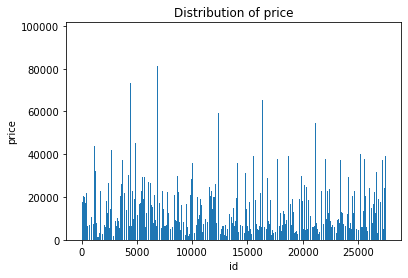

<Figure size 720x720 with 0 Axes>

In [42]:
# 目的変数(charges)の分布を可視化
plt.ylabel('price')
plt.xlabel('id')
plt.title('Distribution of price')
plt.bar(train['id'], train['price'])
fig = plt.figure(figsize = (10,10), facecolor='lightblue')
plt.show()

In [42]:
# trainデータの統計的な情報を表示
train.describe()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
count,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,2.753200e+04,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000,27532.000000
mean,13765.500000,185.334484,2007.832958,47.550196,0.953327,4.462444,1.947080,1.160199e+05,0.755085,0.287447,0.881520,1.938835,6.024699,3.921255,27.525570,13468.724829
std,7947.948142,110.947940,15.758976,17.289061,1.166515,1.213118,0.889685,6.451642e+04,1.656727,0.518347,0.674992,1.587209,4.219596,4.095254,16.415002,10962.149840
min,0.000000,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,-1.318690e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1004.000000
25%,6882.750000,75.000000,2005.000000,42.000000,0.000000,3.000000,2.000000,7.836775e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5759.000000
50%,13765.500000,196.000000,2011.000000,46.000000,0.000000,5.000000,2.000000,1.114445e+05,0.000000,0.000000,1.000000,1.000000,9.000000,1.000000,31.000000,9206.000000
75%,20648.250000,270.000000,2014.000000,53.000000,2.000000,5.000000,2.000000,1.508562e+05,0.000000,1.000000,1.000000,4.000000,9.000000,9.000000,42.000000,19128.000000
max,27531.000000,371.000000,3017.000000,124.000000,5.000000,7.000000,5.000000,2.946000e+06,6.000000,2.000000,2.000000,8.000000,13.000000,11.000000,51.000000,96818.000000


In [13]:
train[['id', 'odometer']].groupby('odometer').count()
train.describe( include = 'all')

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
count,27532.000000,27532,27532.000000,27532,27532,27532,26293,2.753200e+04,27076,27532,27532,27532,27076,27532,24228,27532.000000
unique,NaN,372,NaN,125,6,8,5,NaN,6,3,3,9,13,12,51,NaN
top,NaN,central NJ,NaN,ford,excellent,6 cylinders,gas,NaN,clean,automatic,fwd,full-size,sedan,black,ca,NaN
freq,NaN,1069,NaN,6166,15219,11504,23546,NaN,22365,20497,14602,14585,9259,10143,2702,NaN
mean,13765.500000,NaN,2007.832958,NaN,NaN,NaN,NaN,1.160199e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13468.724829
std,7947.948142,NaN,15.758976,NaN,NaN,NaN,NaN,6.451642e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10962.149840
min,0.000000,NaN,1921.000000,NaN,NaN,NaN,NaN,-1.318690e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1004.000000
25%,6882.750000,NaN,2005.000000,NaN,NaN,NaN,NaN,7.836775e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5759.000000
50%,13765.500000,NaN,2011.000000,NaN,NaN,NaN,NaN,1.114445e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9206.000000
75%,20648.250000,NaN,2014.000000,NaN,NaN,NaN,NaN,1.508562e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19128.000000


In [38]:
# from sklearn.preprocessing import LabelEncoder
# # カテゴリカルな特徴量を数値に変換する
# label_encoder = LabelEncoder()
# categorical_cols = ['region', 'manufacturer', 'condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
# for col in categorical_cols:
#     train[col] = label_encoder.fit_transform(train[col])
# print(train[categorical_cols])

import utils as Util
train = Util.bulk_label_encoding(train, ['region', 'manufacturer', 'condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'])
print(train[categorical_cols])

print(train.describe())

       region  manufacturer  condition  cylinders  fuel  title_status  \
0         215            39          0          5     2             0   
1         321            72          1          6     2             0   
2         358            46          2          5     2             0   
3           3            46          0          3     2             0   
4         264            46          0          5     2             0   
...       ...           ...        ...        ...   ...           ...   
27527     360            46          2          5     2             0   
27528     337            46          0          6     2             0   
27529     269            52          3          5     2             0   
27530     269            52          0          5     2             0   
27531     242            42          0          6     2             4   

       transmission  drive  size  type  paint_color  state  
0                 1      2     4     2            6     51  
1

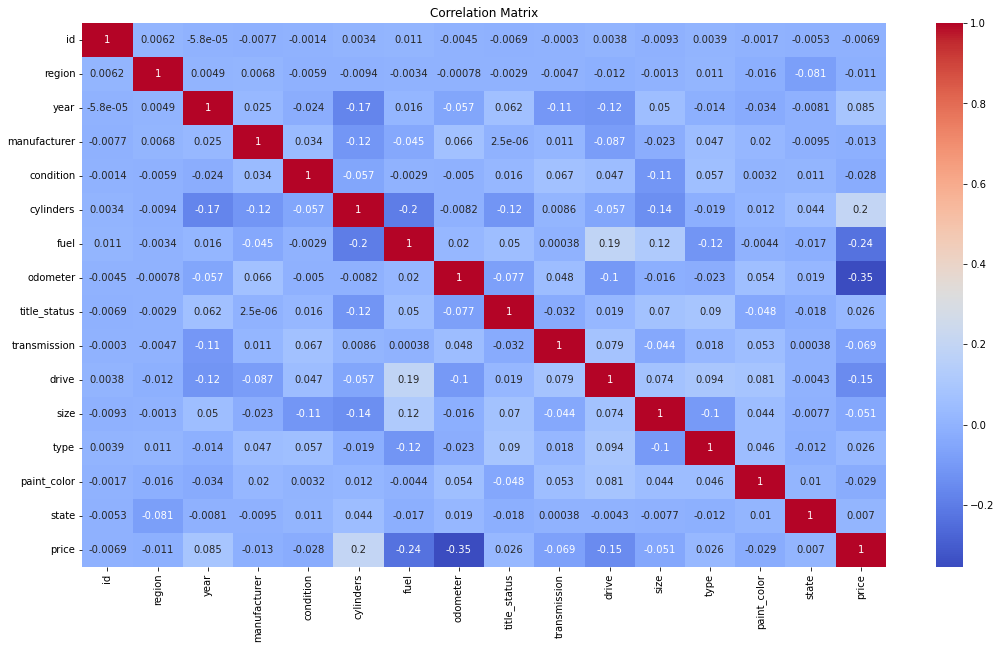

In [39]:
# 数値列の相関行列を計算
correlation_matrix = train.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

odometer       -0.353831
fuel           -0.235598
drive          -0.149378
transmission   -0.069179
size           -0.051000
paint_color    -0.028920
condition      -0.028102
manufacturer   -0.013292
region         -0.010661
id             -0.006868
state           0.007044
type            0.025536
title_status    0.026166
year            0.085313
cylinders       0.200187
Name: price, dtype: float64


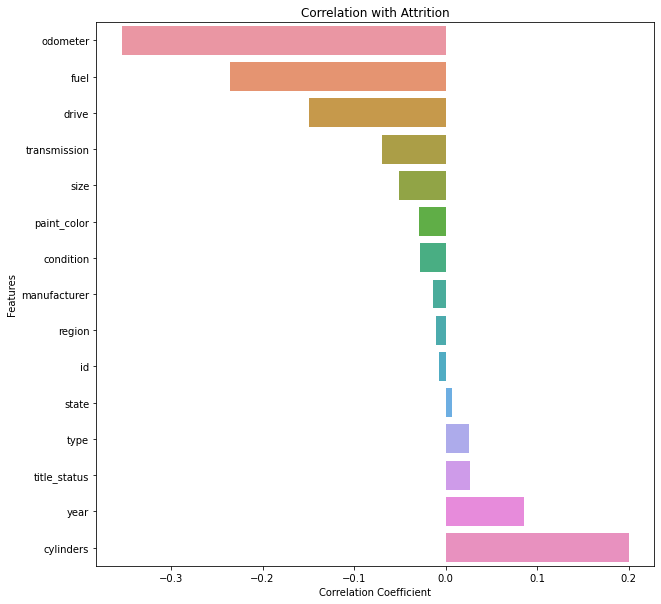

In [40]:
correlation_with_price_range = train.corr()['price'].drop('price')
# 降順でソート
correlation_with_price_range = correlation_with_price_range.sort_values(ascending=True)
print(correlation_with_price_range)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
fig, ax = plt.subplots(figsize=(10, 10)) 
#横棒グラフ作成 
sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with Attrition") 
#表示 
plt.show()

0        27587
1         4724
2        10931
3        16553
4         5158
         ...  
27527    32212
27528     5400
27529    22227
27530     3054
27531    20801
Name: price, Length: 27532, dtype: int64


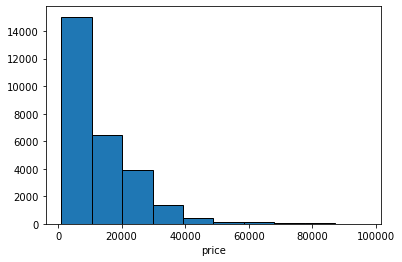

In [7]:
# ヒストグラムの確認
print(train['price'])
data = np.array(train['price'])
plt.hist(data, bins=10, histtype='barstacked', ec='black')
plt.xlabel("price")
plt.show()

In [8]:
# 値ごとの集計するロジック
grouped = train.groupby('price')
# print(grouped)
# print(grouped.size())

category = pd.cut(train['price'], bins=[-1,9999,19999,29999,39999,49999,59999,69999,79999,89999,99999], labels=False)
print(category)

print(train.groupby(category).size())
train[train['price'] > 90000]

0        2
1        0
2        1
3        1
4        0
        ..
27527    3
27528    0
27529    2
27530    0
27531    2
Name: price, Length: 27532, dtype: int64
price
0    14600
1     6740
2     4098
3     1423
4      339
5      148
6       88
7       77
8       17
9        2
dtype: int64


,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
6251,6251,anchorage / mat-su,2018,ford,excellent,6 cylinders,diesel,69656,clean,automatic,4wd,full-size,truck,silver,ak,95329
16550,16550,lakeland,2016,chevrolet,excellent,8 cylinders,diesel,62997,clean,automatic,4wd,full-size,SUV,red,fl,96818
